In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# Dataset
DataSet = '/content/sample_data/mnist_test.csv'

# Read dataset to pandas dataframe.
dataset = pd.read_csv(DataSet, header=None)

# verify loaded dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


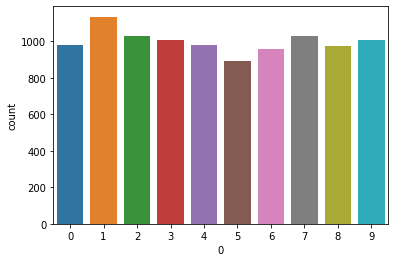

In [ ]:
sns.countplot(dataset.iloc[:,0])
plt.show()

In [ ]:
# Split data into Features, Labels

# first column correspond to the number, other columns contains pixel values(0 to 255)
X = dataset.iloc[:,1:].values
Y = dataset.iloc[:, 0].values

In [ ]:
# Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with a the random seed for reproducible results.

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  8000
Number of test samples:  2000


In [ ]:
# Feature normalization

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fit model to training data

# Linear (acc = 0.93)
#classifier = SVC(kernel='linear')

# Polynomial (acc = 0.90)
#classifier = SVC(kernel='poly')  

# RBF (acc = 0.94)
classifier = SVC() 
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

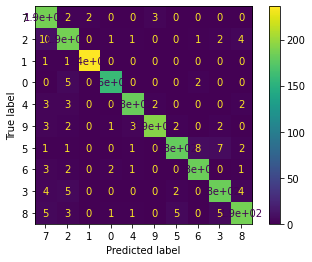

In [ ]:
# Confusion Matrix
class_labels = dataset.iloc[:,0].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [ ]:
# Performance Statistics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       167
           1       0.99      0.99      0.99       238
           2       0.89      0.91      0.90       206
           3       0.92      0.92      0.92       198
           4       0.96      0.95      0.96       192
           5       0.95      0.90      0.93       200
           6       0.94      0.95      0.95       192
           7       0.86      0.96      0.91       194
           8       0.94      0.90      0.92       207
           9       0.97      0.94      0.96       206

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

